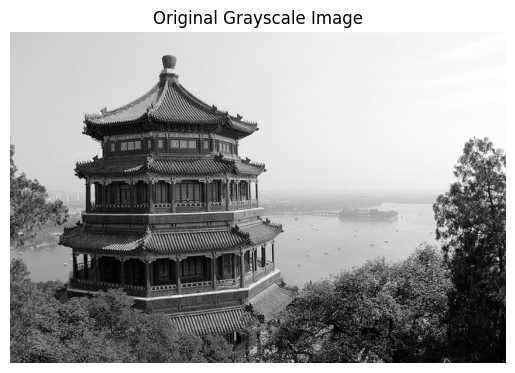

Grayscale Image Shape: (427, 640)


In [31]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt

# Load sample image and convert to grayscale
original_image = load_sample_image("china.jpg")
gray_image = np.mean(original_image, axis=2)  # Convert to grayscale

# Display the original grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

# Show the shape of the grayscale image
print("Grayscale Image Shape:", gray_image.shape)


In [29]:
from sklearn.preprocessing import StandardScaler

# Standardize the grayscale image data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(gray_image)

# Display a sample of standardized pixel data
print("Standardized Pixel Data Sample:\n", X_scaled[:5, :5])


Standardized Pixel Data Sample:
 [[1.17136712 1.12590676 1.11368247 1.11377057 1.08342258]
 [1.13861823 1.10986281 1.09771502 1.11377057 1.08342258]
 [1.17136712 1.12590676 1.11368247 1.11377057 1.08342258]
 [1.18774156 1.1419507  1.12964991 1.13001842 1.08342258]
 [1.16590897 1.12055878 1.12432743 1.12460247 1.0941866 ]]


In [34]:
from sklearn.decomposition import PCA

# Set the number of principal components for compression
n_components = 16  # Retain 50 components for compression
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Display the shape of compressed data
print("Compressed Image Shape (after PCA):", X_pca.shape)


Compressed Image Shape (after PCA): (427, 16)


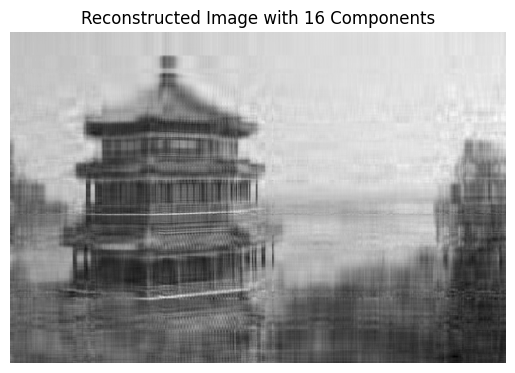

Original Pixel Values (Sample):
 [[202.         202.         202.         202.         202.        ]
 [200.         201.         201.         202.         202.        ]
 [202.         202.         202.         202.         202.        ]
 [203.         203.         203.         203.         202.        ]
 [201.66666667 201.66666667 202.66666667 202.66666667 202.66666667]]
Reconstructed Pixel Values (Sample):
 [[203.43609625 204.31821902 205.82999739 206.32187977 207.92747932]
 [203.21911826 204.1119066  205.72577526 206.22980464 207.82404134]
 [203.78321229 204.64495874 206.1793503  206.623588   208.20209234]
 [204.48590929 205.35514137 206.78677394 207.12165361 208.64381039]
 [204.39872878 205.25050554 206.71619812 207.03908277 208.55599183]]


In [35]:
# Reconstruct the compressed image
X_reconstructed = pca.inverse_transform(X_pca)
X_reconstructed = scaler.inverse_transform(X_reconstructed)  # Reverse scaling for visualization

# Display the reconstructed image and its shape
plt.imshow(X_reconstructed, cmap='gray')
plt.title(f"Reconstructed Image with {n_components} Components")
plt.axis('off')
plt.show()

# Compare a sample of original vs reconstructed pixel values
print("Original Pixel Values (Sample):\n", gray_image[:5, :5])
print("Reconstructed Pixel Values (Sample):\n", X_reconstructed[:5, :5])


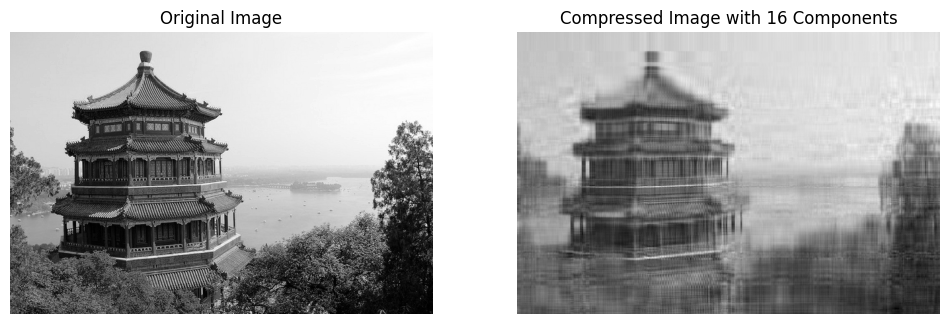

In [36]:
# Plot original and reconstructed images for comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(X_reconstructed, cmap='gray')
ax[1].set_title(f"Compressed Image with {n_components} Components")
ax[1].axis('off')

plt.show()


In [37]:
# Calculate and display cumulative variance ratio
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(f"Cumulative Variance Ratio with {n_components} Components:", cumulative_variance[-1])

# Display the variance ratio of each component (up to the number of components)
print("Variance Ratio for each component:", pca.explained_variance_ratio_)


Cumulative Variance Ratio with 16 Components: 0.8968949183257414
Variance Ratio for each component: [0.62044397 0.15306469 0.02954546 0.01697413 0.01304443 0.00994166
 0.0085474  0.008131   0.00629186 0.00604395 0.00570122 0.00466043
 0.00458632 0.00373808 0.0032114  0.00296891]
